<a href="https://colab.research.google.com/github/Syed-Ayan-Ali/tensorflow_sentiment_classifier/blob/data_directly_from_kaggle/sentiment_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Setup and Load data


## 1.1 Setup environment and Install Dependencies

In [1]:
!pip install tensorflow
!pip install opencv-python
!pip install opendatasets
!pip install cv2
!pip install imghdr

In [4]:
import tensorflow as tf
import os

In [5]:
gpus = tf.config.experimental.list_physical_devices('gpu')
gpus

[]

## 1.2 Get images from kaggle

In [8]:
import opendatasets as od

In [27]:
od.download("https://www.kaggle.com/datasets/alirezaatashnejad/sad-and-happy-face-detection", force=True)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: muhammadsalik
Your Kaggle Key: ··········


100%|██████████| 222M/222M [00:02<00:00, 108MB/s]


## 1.3 Delete irrelevant images

In [31]:
import cv2
import imghdr

In [33]:
# A list of extensions we want to keep
image_extensions_to_keep = ['jpeg' , 'jpg' ,'bmp' , 'png']

# Go through each image class, happy and sad
# then go through each image in the class
# get the image path using os.path.join
# check if the extension is within the allowed extension
# if it is, leave it
# else, delete it using os.remove

data_dir = "sad-and-happy-face-detection/data"

for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        img = cv2.imread(image_path)
        tip = imghdr.what(image_path)
        if tip not in image_extensions_to_keep:
            print('Image not in ext list {}'.format(image_path))
            os.remove(image_path)




## 1.3 Load Data


In [61]:
# Get the details of the images in the dataset using a helper function "image_dataset_from_directory"
data = tf.keras.utils.image_dataset_from_directory(data_dir)
data

Found 1988 files belonging to 2 classes.


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [84]:
# To see the data, we need to load it into memory as an iterator
# Consider an iterator as a sample from a large population
# To access this sample, you would load it into memory and use it using the inbuilt method .as_numpy_iterator()
data_iterator = data.as_numpy_iterator()



In [85]:
import matplotlib.pyplot as plt


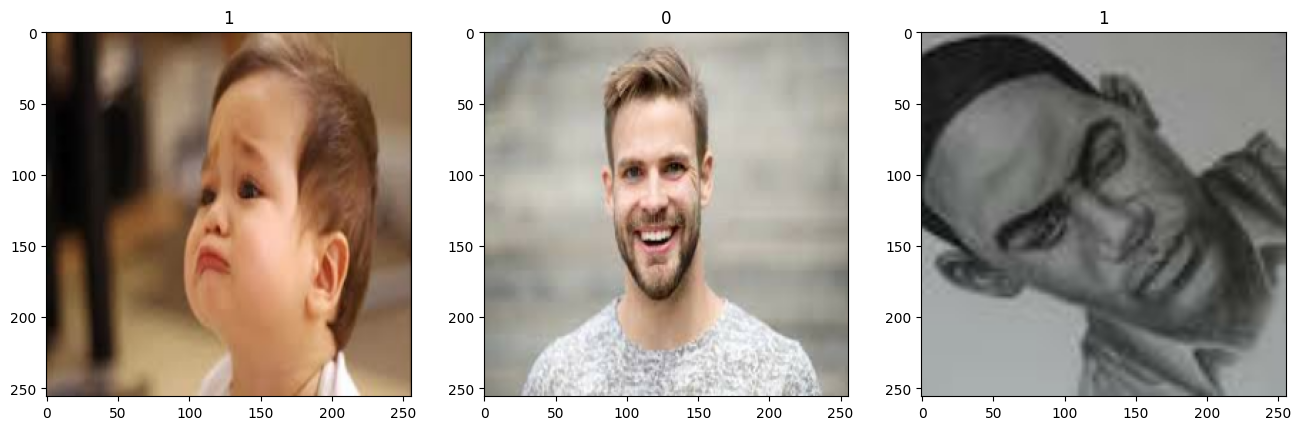

In [92]:
fig, ax = plt.subplots(ncols=3, figsize=(16,16))
for idx, img in enumerate(data_iterator.next()[0][:3]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(data_iterator.next()[1][idx])

# 2. Preprocess Data



## 2.1 Scaling the data

In [93]:
# To optimize the deep learning model training, it's better to have values as small as possible.
# Therefore, we will divide the colour values by 255 to make them between 0 and 1
# Now, all the rgb values are between 0 and 1.

# Lambda funtions allows us to apply a transformation on the variable itself
# by passing the values as parameters which in our case is x-axis pixel and y-axis pixel
data = data.map(lambda x,y: (x/255,y))

### https://www.tensorflow.org/api_docs/python/tf/data/Dataset#map

## 2.2 Splitting the data into training, testing, validation


In [94]:
# Now comes the part where we actually start implementing the Machine Learning model
# Here we have to split the data into 3 parts for 3 different purposes:

# 1. Testing data: the training set is used to train the model;
# 2. Validation data: the validation set is used to track model parameters and *avoid overfitting*;
# 3. Testing data: the testing set is used for checking the model’s performance on *new data*.

# The percentage of splitting is usually 70:20:10

train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)


In [95]:
# Assign the actual image batches to each split

train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)


# 3. Model

## 3.1 Build Neural Network


In [97]:
# import necessary libraries to build a neural network

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D , Dense , Flatten , Dropout

In [98]:
# Create the model
model = Sequential()


In [99]:
# Add several layers to it

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [100]:
# Compile the model
model.compile('adam',loss = tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [101]:
# Show the summary of the model

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

## 3.2 Train the neural network


In [ ]:
# Train the model
hist = model.fit(train,epochs=20,validation_data=val)

Epoch 1/30
44/44 [==============================] - 96s 2s/step - loss: 0.8833 - accuracy: 0.5447 - val_loss: 0.6662 - val_accuracy: 0.5938
Epoch 2/30
44/44 [==============================] - 122s 3s/step - loss: 0.6727 - accuracy: 0.6037 - val_loss: 0.6590 - val_accuracy: 0.6432
Epoch 3/30
44/44 [==============================] - 95s 2s/step - loss: 0.6483 - accuracy: 0.6165 - val_loss: 0.6454 - val_accuracy: 0.5911
Epoch 4/30
44/44 [==============================] - 94s 2s/step - loss: 0.6118 - accuracy: 0.6570 - val_loss: 0.6411 - val_accuracy: 0.6536
Epoch 5/30
44/44 [==============================] - 93s 2s/step - loss: 0.5936 - accuracy: 0.6825 - val_loss: 0.6110 - val_accuracy: 0.6849
Epoch 6/30
44/44 [==============================] - 94s 2s/step - loss: 0.5356 - accuracy: 0.7138 - val_loss: 0.5915 - val_accuracy: 0.7005
Epoch 7/30
44/44 [==============================] - 114s 3s/step - loss: 0.4702 - accuracy: 0.7741 - val_loss: 0.6474 - val_accuracy: 0.6927
Epoch 8/30
44/44 [

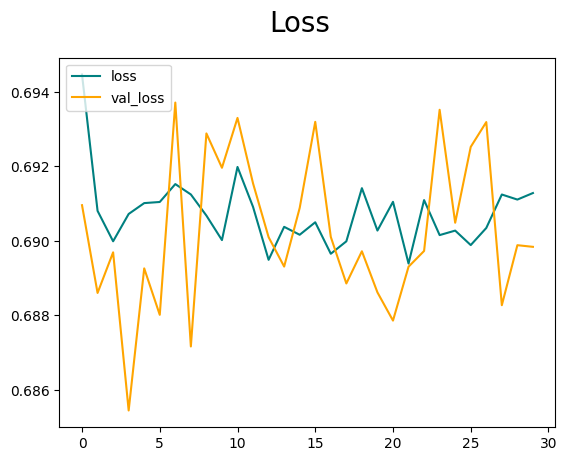

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color = 'teal', label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

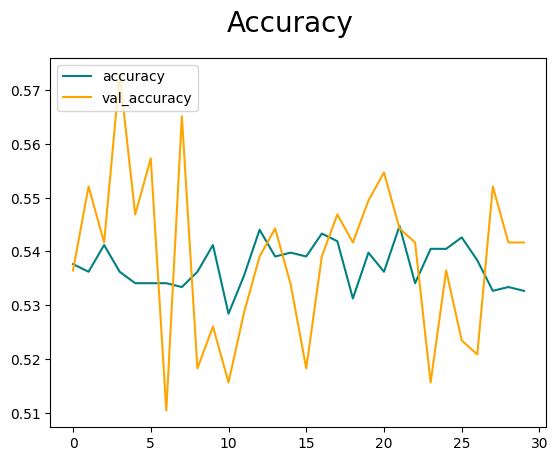

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'] , color ='teal' , label ='accuracy')
plt.plot(hist.history['val_accuracy'], color ='orange' , label = 'val_accuracy')
fig.suptitle('Accuracy' , fontsize =20)
plt.legend(loc="upper left")
plt.show()

# 4. Evaluate the Model

## 4.1 Evaluate

In [ ]:
# Here we will import 3 metrics to measure the reliability of the model.
# Think of this as a test run after you have studied intensively for an exam.
# To test your skills you would attempt a past paper and look at certain metrics, right?
# Like how much time it took you, which topics you struggled with, etc.

# These 3 metrics are typically used for classification problems

from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
# Establish instances of the 3 metrics

precision = Precision()
recall = Recall()
accuracy = BinaryAccuracy()

In [ ]:
# Now comes the testing part
# Remember we split into 3 parts?
# The testing part is now used to check how reliable our model is on entirely new data that it has never seen before.

for batch in test.as_numpy_iterator():
    X, y = batch # True output value
    yhat = model.predict(X) # output from the model

    precision.update_state(y,yhat)
    recall.update_state(y,yhat)
    accuracy.update_state(y,yhat)

1/1 [==============================] - 0s 173ms/step


In [ ]:
print(f'Precision:{precision.result().numpy()}, Recall:{recall.result().numpy()}, Accuracy:{accuracy.result().numpy()}')

Precision:0.7543859481811523, Recall:0.78899085521698, Accuracy:0.734375


In [ ]:
import cv2
import numpy as np

<function matplotlib.pyplot.show(close=None, block=None)>

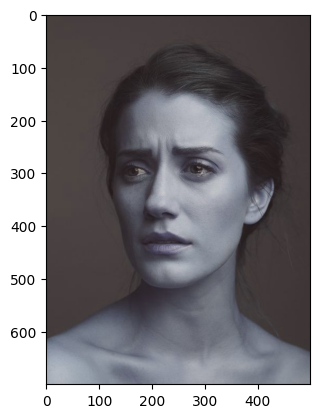

In [ ]:
img = cv2.imread('dataset/666.jpg')
plt.imshow(img)
plt.show

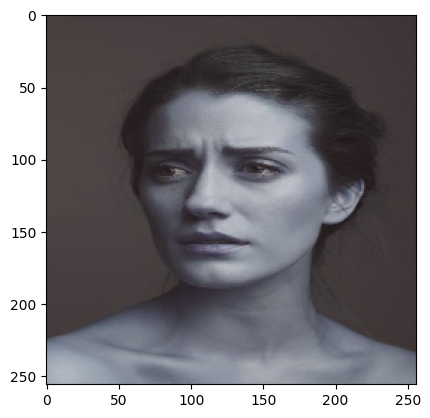

In [ ]:
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
# Currently if we see the shape of resize, it is:

resize.shape

# which means it is a single image

TensorShape([256, 256, 3])

In [ ]:
# Our model expects us to pass a batch of images rather than a single image.
# Hence, we need to add another dimension in the 0th index as that index determined which image it was

np.expand_dims(resize/255, 0).shape

(1, 256, 256, 3)

In [ ]:
expanded_resize = np.expand_dims(resize/255, 0)
yhat = model.predict(expanded_resize)


1/1 [==============================] - 0s 86ms/step


In [ ]:
yhat

array([[0.64655346]], dtype=float32)

In [ ]:
# As this is a binary classification problem,
# there are only 2 outcomes

if yhat > 0.5:
    print('This is a sad face.')
else:
    print('This is a happy face.')

This is a sad face.


# 5. Saving the model


## 5.1 Save


In [ ]:
model.save(os.path.join('models','crashcourse_sentiment_classifier.h5'))

## 5.2 Load (optional)


In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
new_model = load_model(os.path.join('models','crashcourse_sentiment_classifier.h5'))